In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from tools import *
plt.gray()

<Figure size 640x480 with 0 Axes>

In [22]:
frames = read_video_frames("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/test_videos/kempten1.MOV")
### video2
#frames = read_video_frames("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/test_videos/kempten2.MOV")


In [ ]:
frames = frames[0:300]
#img = frames[230][1]
### video2
img = frames[1][1]
#plt.imshow(img)

In [2]:
#img = cv2.imread("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/project_bums/Test_Bilder/IMG_7546.jpeg" )

In [ ]:
#img_test = seg_orientation_lines(img,"W")
#plt.imshow(img)

In [42]:
#make line in the middle of object
img_thresh = thresh_gauss(img)
img_cont = find_max_contour(img_thresh)
# cut image in half 
#cut = 1000

cut = int(4/5 * img.shape[0])
black_up = img_cont[:cut,:]
black_down = img_cont[cut:,:]
#find center of both halfs
c_black_up, koords_up = find_center_plot(black_up)
c_black_down, koords_down = find_center_plot(black_down)
# concatenate both halfs
c_new = np.concatenate((c_black_up, c_black_down))
# make line through middle 
koords = calc_line_koords(koords_up[0], koords_up[1], koords_down[0], koords_down[1]+cut, [0,img.shape[0]])
img_line = cv2.line(c_new, koords[0], koords[1], [0,0,0], 20)

In [ ]:
#plt.imshow(img_line)

In [ ]:
canny = cv2.Canny(img_line, 0, 0)
plt.imshow(canny)

(array([267, 437, 458, 603]),)

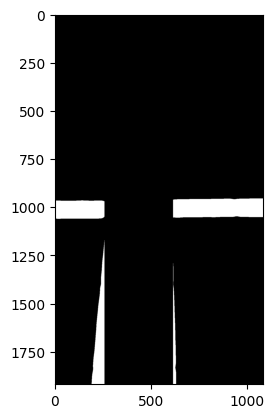

In [47]:
img_cut = img_line.copy()
#TODO pixel over shape
#one = canny[1910,:] > 0
### video2
one = canny[1070,:] > 0

#xposition where img is white at bottom
on = np.where(one==True)
#dist = abs(on[0][0]-on[0][3])

#make black in line 
img_cut[:,on[0][0]-10:on[0][-1]+10] = 0
#in half make black
#img_cut[:1000,:] = 0
#plt.imshow(img_cut)
on

In [1]:
cnts,_ = cv2.findContours(img_cut, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
new = cv2.merge((img_line, img_line, img_line))

cnts_idx = []
for i in range(0,len(cnts)):
    # Calculate the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(cnts[i])
    if w/h > 1:
        cv2.drawContours(new, cnts, i, [255,0,0], 2)
        cnts_idx.append(i)
koords_hor = []        
for i in cnts_idx:
    _,cent = find_center_plot(cnts[i])
    cv2.circle(new,cent,10, [255,0,0], cv2.FILLED)
    koords_hor.append(cent)


if len(koords_hor) == 1:
    if koords_hor[0][0] < (koords[0][0]+koords[1][0])/2:
        print("left")
    if koords_hor[0][0] > (koords[0][0]+koords[1][0])/2:
        print("right")
elif len(koords_hor) == 2:
    if koords_hor[0][0] < (koords[0][0]+koords[1][0])/2 and koords_hor[1][0] > (koords[0][0]+koords[1][0])/2:
        print("left and right")

plt.imshow(new)

NameError: name 'cv2' is not defined


linesh = cv2.HoughLinesP(canny, 1, np.pi/180, 100,
                        minLineLength=200, maxLineGap=50)

lines=np.squeeze(linesh)
black_new = cv2.merge((img_line, img_line, img_line))
black = np.zeros(np.shape(img),dtype='uint8')
for (x1,y1,x2,y2) in lines:
    #find horizontal lines
    if abs(y1-y2) < 50:
        cv2.line(black, (x1,y1), (x2,y2), (255,0,0),5)
plt.imshow(black)


# x11 = []
# x22 = []
# y11 = []
# y22 = []
# for (x1,y1,x2,y2) in lines:
#     #find horizontal lines
#     if abs(x1-x2) > 200:
#         x11.append(x1)
#         x22.append(x2)
#         y11.append(y1)
#         y22.append(y2)
# x11 = np.array(x11)
# y11 = np.array(y11)
# x22 = np.array(x22)
# y22 = np.array(y22)
# #dont plot if no horizontal line 
# if len(x11) > 1: 
#     cv2.line(black_new, (int(x11.mean()),int(y11.mean())), (int(x22.mean()), int(y22.mean())), (0,255,0), 20)
# plt.imshow(black_new)
# h_line = [int(x11.mean()),int(y11.mean()), int(x22.mean()), int(y22.mean())]

kernel = np.array([[0,0,0],[0,0,0],[0,1,0],[0,0,0],[0,0,0]])
new = cv2.filter2D(canny,-1, kernel)
plt.imshow(new)

test_array = np.array([[0,0,0,0],[0,0,255,255],[255,255,0,0],[0,0,0,0]])

arr = test_array[:,2:]
np.max(arr[0:2],axis=0)


col = []
for x in range(0,canny.shape[0],3):
    for y in range(0,canny.shape[1],3):
        arr = canny[:,x:x+3]
        part = np.max(arr[y:y+3],axis=0)
        col.append(part)
        col_arr = np.array([col])

#check for ways to go left or right
koords[1][0]
def check_with_parallel_lines(img,xkoord):
    res = []
    for x in [-500,-300,300,500]:
        ones = np.count_nonzero(img[int((1/2)*img.shape[0]):,xkoord+x] > 0)
        res.append(ones)
    return res
res = check_with_parallel_lines(canny, koords[1][0])
res2 = check_with_parallel_lines(img_line, koords[1][0])
res


horizontal_lines = []
x11 = []
x22 = []
for (x1,y1,x2,y2) in lines:
    #find horizontal lines
    if abs(y1-y2) < 50:
        horizontal_lines.append([x1,y1,x2,y2])
# h_lines = np.array(horizontal_lines).flatten()[0::4]
# h_lines
horizontal_lines

# find longest line vertical 
diffx = []
for (x1,_,x2,_) in lines:
    diffx.append(x2-x1)
llinex = lines[diffx.index(max(diffx))]

#find intersections from script with offset line 
# so we get two/three intersections left and rigth from the "masterline"
llinex = [int(x11.mean()),int(y11.mean()), int(x22.mean()), int(y22.mean())]
l2 = [koords[0][0], koords[0][1], koords[1][0], koords[1][1]]
def find_intersection(l1, l2, offset):
    x1=l1[0]; y1=l1[1]
    x2=l1[2]; y2=l1[3]
    x3=l2[0]+offset; y3=l2[1]
    x4=l2[2]+offset; y4=l2[3]
    denom=(x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    #print(denom)
    if(denom):
        px=((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4))/denom 
        py=((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4))/denom
    else: 
        px=-1
        py=-1
    return (px,py)
sy,sx=img_line.shape
px=[]
py=[]
for x in range(-50,50,50):
    p=find_intersection(llinex,l2,x)
    if(p[0]>0 and p[0]<sx and p[1]>0 and p[1]<sy):
        px.append(p[0])
        py.append(p[1])

#res = final.copy()
for x in range(len(px)):
    #blank = cv2.circle(black_new, (px[x].astype('int'), py[x].astype('int')),100, [255,255,255], cv2.FILLED)
    blank = cv2.circle(black_new, (int(px[x]), int(py[x])),100, [0,0,0], 10)
plt.imshow(blank)

#line to right or left
if px[0] - px[1] < 0: 
    print("go left")
elif px[0] - px[1] > 0: 
    print("go right")
if len(px) >= 2:
    print("you can go left or right") 